# <center> Comaprative Study of Drugs and their side-effects </center>

In [1]:
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import re
import seaborn as sns
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Getting the cleaned file 

In [36]:
df_sf = pd.read_csv("C:/Users/ajink/Downloads/BIA 660/Project/AJ/Tarmadol_oral_reviews_clean.csv", header=0)
df_sf.head()
df_sf.info()  # get detailed information of each column
#df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 10 columns):
Unnamed: 0               2312 non-null int64
Unnamed: 0.1             2312 non-null int64
Reviewer Details         2312 non-null object
 Effectiveness Rating    2312 non-null int64
 Ease_of_Use Rating      2312 non-null int64
 Satisfaction Rating     2312 non-null int64
 Comment                 2312 non-null object
Drug_name                2312 non-null object
Age                      2312 non-null object
Gender                   2312 non-null object
dtypes: int64(5), object(5)
memory usage: 180.7+ KB


In [37]:
comment_list = df_sf[' Comment'].tolist()
comment_list[1]
len(comment_list)
age_list = df_sf['Age'].tolist()

### Finding the Sideeffects from the comments
#### 1. Looking for headache and its synonyms words in the comment column
#### 2. Looking for Nausea and its synonyms
#### 3. Looking for Constipation and its synonyms
#### After finding the synonms for these words in the comment, '1' is stored in the column for that particular side-effect else '0'

In [38]:

searchstrings_headache = ['headache', 'headaches', 'migrane', 'head pain', 'dizziness', 'seizure',
                 'neuralgia', 'head ache', 'head aches']

Headache = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    
    if any(re.findall('|'.join(searchstrings_headache), temp.lower())):
        Headache.append("1")
    else:
        Headache.append("0")

#print(Headache.count('1'))
#print(len(Headache))

In [39]:
searchstrings_constipation = ['constipation', 'convulsion', 'obstiation',
                              'dyschezia', 'fecal impaction']
Constipation = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_constipation), temp.lower())):
        Constipation.append("1")
    else:
        Constipation.append("0")

#print(Constipation.count('1'))
#print(len(Constipation))

In [40]:
searchstrings_nausea = ['nausea', 'upset stomach', 'sickness', 'vomit', 'vomiting',
                        'stomach pain', 'nauseous', 'abdomen pain', 'puke'  ]
#Indicates if Theres side effect or not in comments
Nausea = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_nausea), temp.lower())):
        Nausea.append("1")
    else:
        Nausea.append("0")

#print(Nausea.count('1'))
#print(len(Nausea))

#### Creating a new dataframe with the with columns for headache, nausea and constipation 

In [41]:
side_effects_df = pd.DataFrame(
    {'Headache': Headache,
     'Constipation': Constipation,
     'Nausea': Nausea,
     'Age' : age_list
    })

In [46]:
side_effects_df.head(10)

,Headache,Constipation,Nausea,Age
0,0,0,0,65-74
1,0,0,0,55-64
2,1,0,0,45-54
3,0,0,0,65-74
4,0,0,0,65-74
5,0,1,1,75 or over
6,0,0,0,55-64
7,0,0,0,45-54
8,0,0,1,65-74
9,0,0,0,45-54


#### Here the graph generated below is based on the count of the people who faced the side-effect, but as the number of people in some age category are more the result wil change according to that 

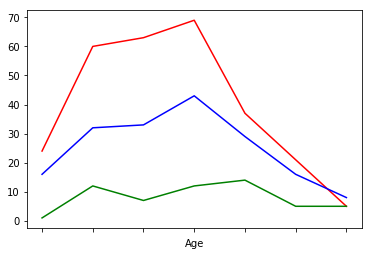

In [22]:
#pd.crosstab(side_effects_df.Age,side_effects_df.Headache)
ax = plt.gca()

pd.crosstab(side_effects_df.Age,side_effects_df.Headache)['1'].plot(kind='line',x='Age',y='Headache', color='red',ax=ax)
pd.crosstab(side_effects_df.Age,side_effects_df.Nausea)['1'].plot(kind='line',x='Age',y='Nausea', color='blue', ax=ax)
pd.crosstab(side_effects_df.Age,side_effects_df.Constipation)['1'].plot(kind='line',x='Age',y='Constipation', color='green', ax=ax)
plt.show()


#### To solve the above problem we have chose to plot the graph by taking the percentage of the number of people in that category who have faced the side effects instead of the count. This gives much better results 

In [23]:
percent_headache = pd.crosstab(side_effects_df.Age,side_effects_df.Headache)
percent_headache['Total'] = percent_headache['0'] +  percent_headache['1']
percent_headache['Headache_per'] = (percent_headache['1'] /  percent_headache['Total']) *100
percent_headache['Age'] = percent_headache.index
percent_headache

Headache,0,1,Total,Headache_per,Age
Age,,,,,
19-24,109,24,133,18.045113,19-24
25-34,287,60,347,17.291066,25-34
35-44,333,63,396,15.909091,35-44
45-54,539,69,608,11.348684,45-54
55-64,476,37,513,7.212476,55-64
65-74,216,21,237,8.860759,65-74
75 or over,73,5,78,6.410256,75 or over


In [24]:
percent_nausea = pd.crosstab(side_effects_df.Age,side_effects_df.Nausea)
percent_nausea['Total'] = percent_nausea['0'] +  percent_nausea['1']
percent_nausea['Nausea_per'] = (percent_nausea['1'] /  percent_nausea['Total']) *100
percent_nausea['Age'] = percent_nausea.index
percent_nausea

Nausea,0,1,Total,Nausea_per,Age
Age,,,,,
19-24,117,16,133,12.030075,19-24
25-34,315,32,347,9.221902,25-34
35-44,363,33,396,8.333333,35-44
45-54,565,43,608,7.072368,45-54
55-64,484,29,513,5.653021,55-64
65-74,221,16,237,6.751055,65-74
75 or over,70,8,78,10.256410,75 or over


In [25]:
percent_constipation = pd.crosstab(side_effects_df.Age,side_effects_df.Constipation)
percent_constipation['Total'] = percent_constipation['0'] +  percent_constipation['1']
percent_constipation['Constipation_per'] = (percent_constipation['1'] /  percent_constipation['Total']) *100
percent_constipation['Age'] = percent_constipation.index
percent_constipation

Constipation,0,1,Total,Constipation_per,Age
Age,,,,,
19-24,132,1,133,0.751880,19-24
25-34,335,12,347,3.458213,25-34
35-44,389,7,396,1.767677,35-44
45-54,596,12,608,1.973684,45-54
55-64,499,14,513,2.729045,55-64
65-74,232,5,237,2.109705,65-74
75 or over,73,5,78,6.410256,75 or over


In [26]:
type(percent_constipation)
percent_constipation.index

Index(['19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over'], dtype='object', name='Age')

#### Using the percentage columns of the side-effects we have plotted a line graph so that we can see how the side-effects of the drug affect across various age categories

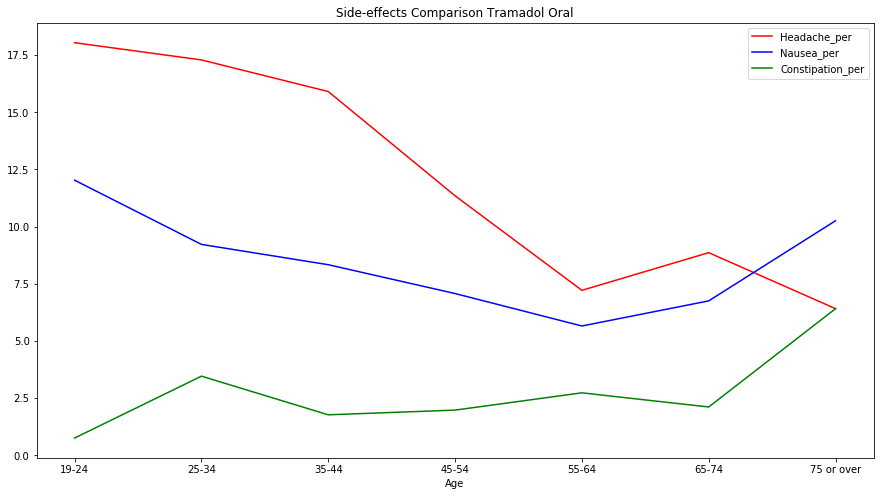

In [29]:
ax = plt.gca()

percent_headache.plot(kind='line',x='Age',y='Headache_per',color='red',ax=ax)
percent_nausea.plot(kind='line',x='Age',y='Nausea_per', color='blue', ax=ax)
percent_constipation.plot(kind='line', figsize=(15,8), x='Age',y='Constipation_per', color='green', ax=ax)
#plt.xlabel("Age");
#ax.set_xlabel("Age")
percent_headache.index.name = 'Age'
ax.set_title('Side-effects Comparison Tramadol Oral')
plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.savefig('Tramadol_oral.png', bbox_inches='tight')
plt.show()
#plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.show()

#### Side-effects Comparison OxyContin

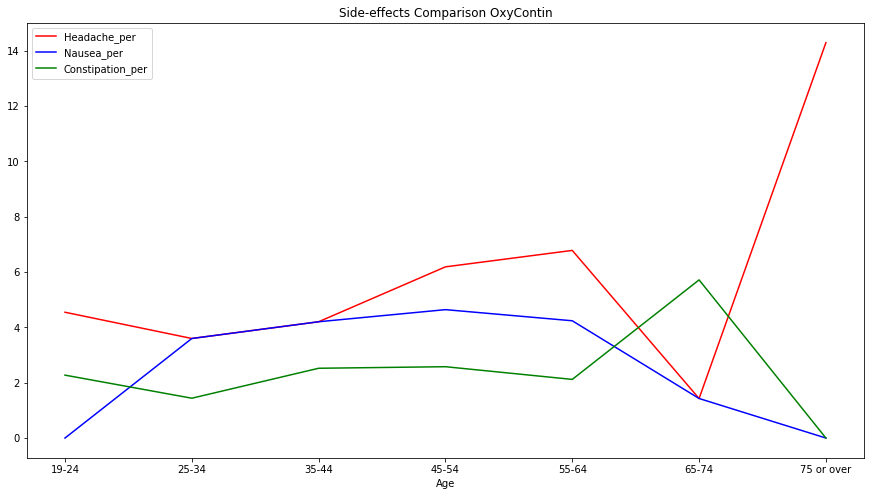

In [47]:
#### Side-effect graph for OxyContin
df_sf = pd.read_csv("C:/Users/ajink/Downloads/BIA 660/Project/AJ/reviews_oxyContin_clean.csv", header=0)
df_sf.head()
#df_sf.info()  # get detailed information of each column
#df
comment_list = df_sf[' Comment'].tolist()
comment_list[1]
len(comment_list)
age_list = df_sf['Age'].tolist()

searchstrings_headache = ['headache', 'headaches', 'migrane', 'head pain', 'dizziness', 'seizure',
                 'neuralgia', 'head ache', 'head aches']

Headache = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    
    if any(re.findall('|'.join(searchstrings_headache), temp.lower())):
        Headache.append("1")
    else:
        Headache.append("0")

#print(Headache.count('1'))
#print(len(Headache))

searchstrings_constipation = ['constipation', 'convulsion', 'obstiation',
                              'dyschezia', 'fecal impaction']
Constipation = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_constipation), temp.lower())):
        Constipation.append("1")
    else:
        Constipation.append("0")

#print(Constipation.count('1'))
#print(len(Constipation))

searchstrings_nausea = ['nausea', 'upset stomach', 'sickness', 'vomit', 'vomiting',
                        'stomach pain', 'nauseous', 'abdomen pain', 'puke'  ]
#Indicates if Theres side effect or not in comments
Nausea = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_nausea), temp.lower())):
        Nausea.append("1")
    else:
        Nausea.append("0")

#print(Nausea.count('1'))
#print(len(Nausea))

side_effects_df = pd.DataFrame(
    {'Headache': Headache,
     'Constipation': Constipation,
     'Nausea': Nausea,
     'Age' : age_list
    })

percent_headache = pd.crosstab(side_effects_df.Age,side_effects_df.Headache)
percent_headache['Total'] = percent_headache['0'] +  percent_headache['1']
percent_headache['Headache_per'] = (percent_headache['1'] /  percent_headache['Total']) *100
percent_headache['Age'] = percent_headache.index
percent_headache

percent_nausea = pd.crosstab(side_effects_df.Age,side_effects_df.Nausea)
percent_nausea['Total'] = percent_nausea['0'] +  percent_nausea['1']
percent_nausea['Nausea_per'] = (percent_nausea['1'] /  percent_nausea['Total']) *100
percent_nausea['Age'] = percent_nausea.index
percent_nausea

percent_constipation = pd.crosstab(side_effects_df.Age,side_effects_df.Constipation)
percent_constipation['Total'] = percent_constipation['0'] +  percent_constipation['1']
percent_constipation['Constipation_per'] = (percent_constipation['1'] /  percent_constipation['Total']) *100
percent_constipation['Age'] = percent_constipation.index
percent_constipation

ax = plt.gca()

percent_headache.plot(kind='line',x='Age',y='Headache_per',color='red',ax=ax)
percent_nausea.plot(kind='line',x='Age',y='Nausea_per', color='blue', ax=ax)
percent_constipation.plot(kind='line', figsize=(15,8), x='Age',y='Constipation_per', color='green', ax=ax)
#plt.xlabel("Age");
#ax.set_xlabel("Age")
percent_headache.index.name = 'Age'
ax.set_title('Side-effects Comparison OxyContin')
plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.savefig('reviews_oxyContin.png', bbox_inches='tight')
plt.show()
#plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.show()

#### Side-effects Comparison Methadone

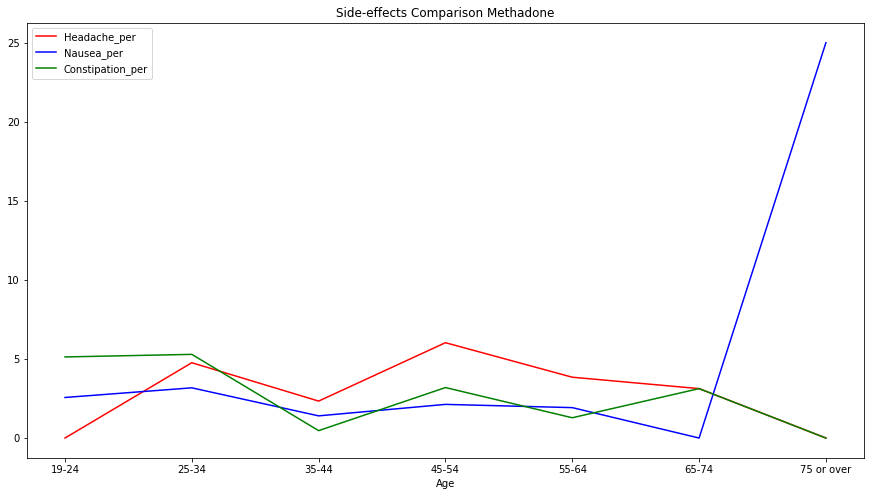

In [48]:

df_sf = pd.read_csv("C:/Users/ajink/Downloads/BIA 660/Project/AJ/methadone_reviews_clean.csv", header=0)
df_sf.head()
#df_sf.info()  # get detailed information of each column
#df
comment_list = df_sf[' Comment'].tolist()
comment_list[1]
len(comment_list)
age_list = df_sf['Age'].tolist()

searchstrings_headache = ['headache', 'headaches', 'migrane', 'head pain', 'dizziness', 'seizure',
                 'neuralgia', 'head ache', 'head aches']

Headache = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    
    if any(re.findall('|'.join(searchstrings_headache), temp.lower())):
        Headache.append("1")
    else:
        Headache.append("0")

#print(Headache.count('1'))
#print(len(Headache))

searchstrings_constipation = ['constipation', 'convulsion', 'obstiation',
                              'dyschezia', 'fecal impaction']
Constipation = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_constipation), temp.lower())):
        Constipation.append("1")
    else:
        Constipation.append("0")

#print(Constipation.count('1'))
#print(len(Constipation))

searchstrings_nausea = ['nausea', 'upset stomach', 'sickness', 'vomit', 'vomiting',
                        'stomach pain', 'nauseous', 'abdomen pain', 'puke'  ]
#Indicates if Theres side effect or not in comments
Nausea = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_nausea), temp.lower())):
        Nausea.append("1")
    else:
        Nausea.append("0")

#print(Nausea.count('1'))
#print(len(Nausea))

side_effects_df = pd.DataFrame(
    {'Headache': Headache,
     'Constipation': Constipation,
     'Nausea': Nausea,
     'Age' : age_list
    })

percent_headache = pd.crosstab(side_effects_df.Age,side_effects_df.Headache)
percent_headache['Total'] = percent_headache['0'] +  percent_headache['1']
percent_headache['Headache_per'] = (percent_headache['1'] /  percent_headache['Total']) *100
percent_headache['Age'] = percent_headache.index
percent_headache

percent_nausea = pd.crosstab(side_effects_df.Age,side_effects_df.Nausea)
percent_nausea['Total'] = percent_nausea['0'] +  percent_nausea['1']
percent_nausea['Nausea_per'] = (percent_nausea['1'] /  percent_nausea['Total']) *100
percent_nausea['Age'] = percent_nausea.index
percent_nausea

percent_constipation = pd.crosstab(side_effects_df.Age,side_effects_df.Constipation)
percent_constipation['Total'] = percent_constipation['0'] +  percent_constipation['1']
percent_constipation['Constipation_per'] = (percent_constipation['1'] /  percent_constipation['Total']) *100
percent_constipation['Age'] = percent_constipation.index
percent_constipation

ax = plt.gca()

percent_headache.plot(kind='line',x='Age',y='Headache_per',color='red',ax=ax)
percent_nausea.plot(kind='line',x='Age',y='Nausea_per', color='blue', ax=ax)
percent_constipation.plot(kind='line', figsize=(15,8), x='Age',y='Constipation_per', color='green', ax=ax)
#plt.xlabel("Age");
#ax.set_xlabel("Age")
percent_headache.index.name = 'Age'
ax.set_title('Side-effects Comparison Methadone')
plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.savefig('Methadone.png', bbox_inches='tight')
plt.show()
#plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.show()

#### Side-effects Comparison Morphine

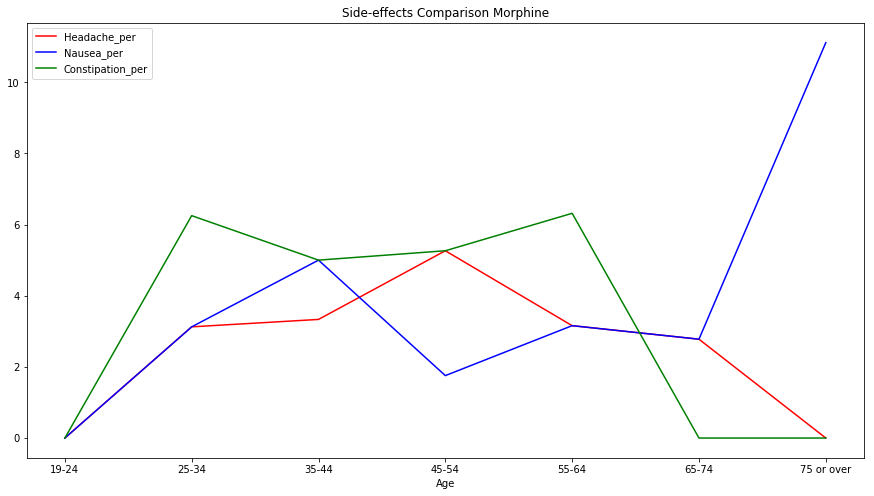

In [35]:
#### Side-effect graph for Methadone
df_sf = pd.read_csv("C:/Users/ajink/Downloads/BIA 660/Project/AJ/morphine_reviews_clean.csv", header=0)
df_sf.head()
#df_sf.info()  # get detailed information of each column
#df
comment_list = df_sf[' Comment'].tolist()
comment_list[1]
len(comment_list)
age_list = df_sf['Age'].tolist()

searchstrings_headache = ['headache', 'headaches', 'migrane', 'head pain', 'dizziness', 'seizure',
                 'neuralgia', 'head ache', 'head aches']

Headache = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    
    if any(re.findall('|'.join(searchstrings_headache), temp.lower())):
        Headache.append("1")
    else:
        Headache.append("0")

#print(Headache.count('1'))
#print(len(Headache))

searchstrings_constipation = ['constipation', 'convulsion', 'obstiation',
                              'dyschezia', 'fecal impaction']
Constipation = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_constipation), temp.lower())):
        Constipation.append("1")
    else:
        Constipation.append("0")

#print(Constipation.count('1'))
#print(len(Constipation))

searchstrings_nausea = ['nausea', 'upset stomach', 'sickness', 'vomit', 'vomiting',
                        'stomach pain', 'nauseous', 'abdomen pain', 'puke'  ]
#Indicates if Theres side effect or not in comments
Nausea = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_nausea), temp.lower())):
        Nausea.append("1")
    else:
        Nausea.append("0")

#print(Nausea.count('1'))
#print(len(Nausea))

side_effects_df = pd.DataFrame(
    {'Headache': Headache,
     'Constipation': Constipation,
     'Nausea': Nausea,
     'Age' : age_list
    })

percent_headache = pd.crosstab(side_effects_df.Age,side_effects_df.Headache)
percent_headache['Total'] = percent_headache['0'] +  percent_headache['1']
percent_headache['Headache_per'] = (percent_headache['1'] /  percent_headache['Total']) *100
percent_headache['Age'] = percent_headache.index
percent_headache

percent_nausea = pd.crosstab(side_effects_df.Age,side_effects_df.Nausea)
percent_nausea['Total'] = percent_nausea['0'] +  percent_nausea['1']
percent_nausea['Nausea_per'] = (percent_nausea['1'] /  percent_nausea['Total']) *100
percent_nausea['Age'] = percent_nausea.index
percent_nausea

percent_constipation = pd.crosstab(side_effects_df.Age,side_effects_df.Constipation)
percent_constipation['Total'] = percent_constipation['0'] +  percent_constipation['1']
percent_constipation['Constipation_per'] = (percent_constipation['1'] /  percent_constipation['Total']) *100
percent_constipation['Age'] = percent_constipation.index
percent_constipation

ax = plt.gca()

percent_headache.plot(kind='line',x='Age',y='Headache_per',color='red',ax=ax)
percent_nausea.plot(kind='line',x='Age',y='Nausea_per', color='blue', ax=ax)
percent_constipation.plot(kind='line', figsize=(15,8), x='Age',y='Constipation_per', color='green', ax=ax)
#plt.xlabel("Age");
#ax.set_xlabel("Age")
percent_headache.index.name = 'Age'
ax.set_title('Side-effects Comparison Morphine')
plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.savefig('Morphine.png', bbox_inches='tight')
plt.show()
#plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.show()

#### Side-effects Comparison OxyCodone

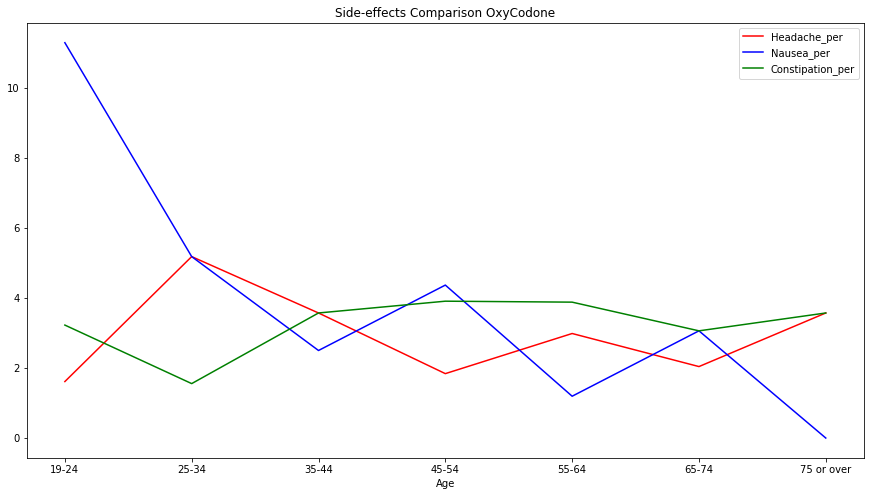

In [49]:
#### Side-effect graph for Methadone
df_sf = pd.read_csv("C:/Users/ajink/Downloads/BIA 660/Project/AJ/reviews_oxyCodone_clean.csv", header=0)
df_sf.head()
#df_sf.info()  # get detailed information of each column
#df
comment_list = df_sf[' Comment'].tolist()
comment_list[1]
len(comment_list)
age_list = df_sf['Age'].tolist()

searchstrings_headache = ['headache', 'headaches', 'migrane', 'head pain', 'dizziness', 'seizure',
                 'neuralgia', 'head ache', 'head aches']

Headache = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    
    if any(re.findall('|'.join(searchstrings_headache), temp.lower())):
        Headache.append("1")
    else:
        Headache.append("0")

#print(Headache.count('1'))
#print(len(Headache))

searchstrings_constipation = ['constipation', 'convulsion', 'obstiation',
                              'dyschezia', 'fecal impaction']
Constipation = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_constipation), temp.lower())):
        Constipation.append("1")
    else:
        Constipation.append("0")

#print(Constipation.count('1'))
#print(len(Constipation))

searchstrings_nausea = ['nausea', 'upset stomach', 'sickness', 'vomit', 'vomiting',
                        'stomach pain', 'nauseous', 'abdomen pain', 'puke'  ]
#Indicates if Theres side effect or not in comments
Nausea = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_nausea), temp.lower())):
        Nausea.append("1")
    else:
        Nausea.append("0")

#print(Nausea.count('1'))
#print(len(Nausea))

side_effects_df = pd.DataFrame(
    {'Headache': Headache,
     'Constipation': Constipation,
     'Nausea': Nausea,
     'Age' : age_list
    })

percent_headache = pd.crosstab(side_effects_df.Age,side_effects_df.Headache)
percent_headache['Total'] = percent_headache['0'] +  percent_headache['1']
percent_headache['Headache_per'] = (percent_headache['1'] /  percent_headache['Total']) *100
percent_headache['Age'] = percent_headache.index
percent_headache

percent_nausea = pd.crosstab(side_effects_df.Age,side_effects_df.Nausea)
percent_nausea['Total'] = percent_nausea['0'] +  percent_nausea['1']
percent_nausea['Nausea_per'] = (percent_nausea['1'] /  percent_nausea['Total']) *100
percent_nausea['Age'] = percent_nausea.index
percent_nausea

percent_constipation = pd.crosstab(side_effects_df.Age,side_effects_df.Constipation)
percent_constipation['Total'] = percent_constipation['0'] +  percent_constipation['1']
percent_constipation['Constipation_per'] = (percent_constipation['1'] /  percent_constipation['Total']) *100
percent_constipation['Age'] = percent_constipation.index
percent_constipation

ax = plt.gca()

percent_headache.plot(kind='line',x='Age',y='Headache_per',color='red',ax=ax)
percent_nausea.plot(kind='line',x='Age',y='Nausea_per', color='blue', ax=ax)
percent_constipation.plot(kind='line', figsize=(15,8), x='Age',y='Constipation_per', color='green', ax=ax)
#plt.xlabel("Age");
#ax.set_xlabel("Age")
percent_headache.index.name = 'Age'
ax.set_title('Side-effects Comparison OxyCodone')
plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.savefig('OxyCodone.png', bbox_inches='tight')
plt.show()
#plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.show()

#### Side-effects Comparison Combined_data

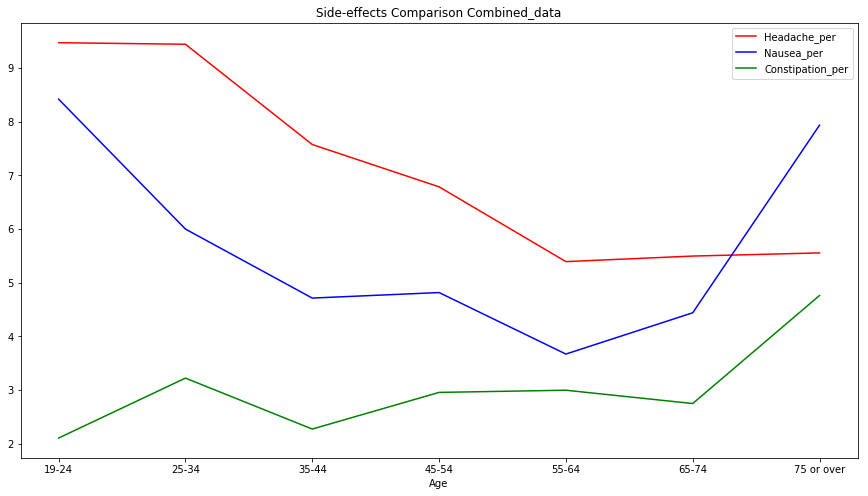

In [50]:
#### Side-effect graph for Methadone
df_sf = pd.read_csv("C:/Users/ajink/Downloads/BIA 660/Project/AJ/combined_data_clean.csv", header=0)
df_sf.head()
#df_sf.info()  # get detailed information of each column
#df
comment_list = df_sf[' Comment'].tolist()
comment_list[1]
len(comment_list)
age_list = df_sf['Age'].tolist()

searchstrings_headache = ['headache', 'headaches', 'migrane', 'head pain', 'dizziness', 'seizure',
                 'neuralgia', 'head ache', 'head aches']

Headache = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    
    if any(re.findall('|'.join(searchstrings_headache), temp.lower())):
        Headache.append("1")
    else:
        Headache.append("0")

#print(Headache.count('1'))
#print(len(Headache))

searchstrings_constipation = ['constipation', 'convulsion', 'obstiation',
                              'dyschezia', 'fecal impaction']
Constipation = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_constipation), temp.lower())):
        Constipation.append("1")
    else:
        Constipation.append("0")

#print(Constipation.count('1'))
#print(len(Constipation))

searchstrings_nausea = ['nausea', 'upset stomach', 'sickness', 'vomit', 'vomiting',
                        'stomach pain', 'nauseous', 'abdomen pain', 'puke'  ]
#Indicates if Theres side effect or not in comments
Nausea = []
for j in range(len(comment_list)):
    temp = comment_list[j]
    if any(re.findall('|'.join(searchstrings_nausea), temp.lower())):
        Nausea.append("1")
    else:
        Nausea.append("0")

#print(Nausea.count('1'))
#print(len(Nausea))

side_effects_df = pd.DataFrame(
    {'Headache': Headache,
     'Constipation': Constipation,
     'Nausea': Nausea,
     'Age' : age_list
    })

percent_headache = pd.crosstab(side_effects_df.Age,side_effects_df.Headache)
percent_headache['Total'] = percent_headache['0'] +  percent_headache['1']
percent_headache['Headache_per'] = (percent_headache['1'] /  percent_headache['Total']) *100
percent_headache['Age'] = percent_headache.index
percent_headache

percent_nausea = pd.crosstab(side_effects_df.Age,side_effects_df.Nausea)
percent_nausea['Total'] = percent_nausea['0'] +  percent_nausea['1']
percent_nausea['Nausea_per'] = (percent_nausea['1'] /  percent_nausea['Total']) *100
percent_nausea['Age'] = percent_nausea.index
percent_nausea

percent_constipation = pd.crosstab(side_effects_df.Age,side_effects_df.Constipation)
percent_constipation['Total'] = percent_constipation['0'] +  percent_constipation['1']
percent_constipation['Constipation_per'] = (percent_constipation['1'] /  percent_constipation['Total']) *100
percent_constipation['Age'] = percent_constipation.index
percent_constipation

ax = plt.gca()

percent_headache.plot(kind='line',x='Age',y='Headache_per',color='red',ax=ax)
percent_nausea.plot(kind='line',x='Age',y='Nausea_per', color='blue', ax=ax)
percent_constipation.plot(kind='line', figsize=(15,8), x='Age',y='Constipation_per', color='green', ax=ax)
#plt.xlabel("Age");
#ax.set_xlabel("Age")
percent_headache.index.name = 'Age'
ax.set_title('Side-effects Comparison Combined_data')
plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.savefig('combined_data.png', bbox_inches='tight')
plt.show()
#plt.xticks(np.arange(len(percent_headache.index)), percent_headache.index)
#plt.show()